In [38]:
Rebel_68_relations = {'applies to jurisdiction',
 'author',
 'based on',
 'candidacy in election',
 'candidate',
 'capital',
 'capital of',
 'chairperson',
 'contains administrative territorial entity',
 'country',
 'country of citizenship',
 'date of birth',
 'date of death',
 'diplomatic relation',
 'educated at',
 'employer',
 'ethnic group',
 'facet of',
 'field of work',
 'founded by',
 'has part',
 'head of government',
 'headquarters location',
 'inception',
 'instance of',
 'language of work or name',
 'language used',
 'legislative body',
 'located in or next to body of water',
 'located in the administrative territorial entity',
 'location',
 'main subject',
 'member of',
 'member of political party',
 'military branch',
 'mouth of the watercourse',
 'notable work',
 'number of participants',
 'occupant',
 'occupation',
 'office held by head of government',
 'officeholder',
 'operator',
 'owned by',
 'owner of',
 'parent organization',
 'part of',
 'participant',
 'participant in',
 'performer',
 'place of birth',
 'place of death',
 'place of publication',
 'point in time',
 'residence',
 'shares border with',
 'significant event',
 'spouse',
 'subsidiary',
 'tributary',
 'twinned administrative body',
 'used by',
 'uses',
 'work location'}

In [39]:
conll04_5_relations = {'employer', 'headquarters location', 'killed by', 'location', 'residence'}

In [94]:
mapping = {'employer': ['derivative work',   'inception', 'instance of', 'owned by', 'owner of', 'part of', 'participant', 
'participant in', 'performer', 'twinned administrative body', 'employer', 'field of work', 
'language of work or name', 'notable work', 'occupation', 'member of', 'member of political party', 'officeholder',
 'operator', 'position held', 'educated at', 'founded by',
'product or material produced', 'subsidiary', 'work location', 'author', 
'office held by head of government', 'used by', 'uses', 'candidacy in election', 'candidate',  'chairperson', 'head of government' ], 
'headquarters location': ['legislative body', 'contains administrative territorial entity', 
'headquarters location', 'located in the administrative territorial entity', 'ethnic group', 'language used',
'military branch', 'parent organization', 'applies to jurisdiction'],
 'killed by': ['date of death',  'main subject', 'place of death', 'facet of', 'significant event'], 'location': ['country', 'located in or next to body of water', 'location', 
 'mouth of the watercourse', 'point in time', 'capital', 'capital of', 
 'shares border with', 'tributary', 'diplomatic relation', 'place of publication', 'spouse'], 
 'residence': [ 'place of birth', 'based on' ,  
 'country of citizenship', 'date of birth' , 'has part', 
 'number of participants', 'occupant', 'relative', 'residence']}

### Test_triples.json - Golden Truth of tRiples
### predconll04extractedfromrebel - rebel extraction
### mistral file with prediction - pred_conll04_mistral_p.json
### Prediction with gemma model - pred_gemmma_conll04.json

In [93]:
Test_triples = "/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json" # Has 5 relation types, 288 instances
Pred_rebel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel.json" #Has 68 relation types, 288 instances
Pred_mistral = "/Users/ananyahooda/Desktop/final/pred_conll04_Mistral.json"  #       , 288 instances, -26 as strings = 268 instances
Pred_gemma = "/Users/ananyahooda/Desktop/final/pred_gemmma_conll04.json" #             , 288 instances, -99 as strings = 187 instances

In [16]:
with open(Test_triples, 'r') as file:
    data1 = json.load(file)

with open(Pred_rebel, 'r') as file:
    data2 = json.load(file)

with open(Pred_mistral, 'r') as file:
    data3 = json.load(file)

with open(Pred_gemma, 'r') as file:
    data4 = json.load(file)

# Determine the length of both JSON files
length_data1 = len(data1)
length_data2 = len(data2)
length_data3 = len(data3)
length_data4 = len(data4)

# Print the lengths
print(f"Length of the golden truth JSON file: {length_data1}")
print(f"Length of the prediction JSON file: {length_data2}")
print(f"Length of the golden truth JSON file: {length_data1}")
print(f"Length of the prediction JSON file: {length_data2}")

Length of the golden truth JSON file: 288
Length of the prediction JSON file: 288
Length of the golden truth JSON file: 288
Length of the prediction JSON file: 288


## Calculating HAllucination _ hallucination logs are in Final_data_cluster folder

In [19]:
string_triples_count = 0
string_triples = []

# Iterate over the entries and check the type of "triples"
for entry in data1:
    if 'triples' in entry and isinstance(entry['triples'], str):
        string_triples_count += 1
        string_triples.append(entry['triples'])

# Print the count of such entries

print(f"Number of entries with 'triples' as a string: {string_triples_count}")

for i, string in enumerate(string_triples, start=1):
    print(f"String {i}: {string}")

Number of entries with 'triples' as a string: 0


### Removing strings from mistral and gemma predictions

In [26]:
Pred_mistral_nostring = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring.json" #262 instances
Pred_gemma_nostring = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring.json" #187 instances
test_triple_nostring_mistral = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_mistral.json" #262 instances
test_triple_nostring_gemma = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_gemma.json" #187 instances
Pred_rebel_nostring_mistral = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral.json" #262 instances
Pred_rebel_nostring_gemma = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma.json" #187 instances

In [21]:
import json

# Load the JSON data from the two files
with open(Test_triples, 'r') as file:
    data1 = json.load(file)

with open(Pred_mistral, 'r') as file:
    data2 = json.load(file)

# Find the IDs of entries with "triples" as a string in file1
ids_to_remove = [entry['id'] for entry in data2 if 'triples' in entry and isinstance(entry['triples'], str)]

# Remove the entries from both files
filtered_data1 = [entry for entry in data1 if entry['id'] not in ids_to_remove]
filtered_data2 = [entry for entry in data2 if entry['id'] not in ids_to_remove]

# Save the filtered data back to new JSON files
with open(test_triple_nostring_mistral, 'w') as file:
    json.dump(filtered_data1 , file, indent=4)

with open(Pred_mistral_nostring, 'w') as file:
    json.dump(filtered_data2, file, indent=4)

# Print a message to indicate that the entries have been removed
print(f"Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'")

Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'


In [25]:
import json

# Load the JSON data from the two files
with open(Test_triples, 'r') as file:
    data1 = json.load(file)

with open(Pred_gemma, 'r') as file:
    data2 = json.load(file)

# Find the IDs of entries with "triples" as a string in file1
ids_to_remove = [entry['id'] for entry in data2 if 'triples' in entry and isinstance(entry['triples'], str)]

# Remove the entries from both files
filtered_data1 = [entry for entry in data1 if entry['id'] not in ids_to_remove]
filtered_data2 = [entry for entry in data2 if entry['id'] not in ids_to_remove]

# Save the filtered data back to new JSON files
with open(test_triple_nostring_gemma, 'w') as file:
    json.dump(filtered_data1 , file, indent=4)

with open(Pred_gemma_nostring, 'w') as file:
    json.dump(filtered_data2, file, indent=4)

# Print a message to indicate that the entries have been removed
print(f"Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'")

Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'


In [28]:
import json

# Load the JSON data from the two files
with open(Pred_rebel, 'r') as file:
    data1 = json.load(file)

with open(Pred_gemma, 'r') as file:
    data2 = json.load(file)

# Find the IDs of entries with "triples" as a string in file1
ids_to_remove = [entry['id'] for entry in data2 if 'triples' in entry and isinstance(entry['triples'], str)]

# Remove the entries from both files
filtered_data1 = [entry for entry in data1 if entry['id'] not in ids_to_remove]


# Save the filtered data back to new JSON files
with open(Pred_rebel_nostring_gemma, 'w') as file:
    json.dump(filtered_data1 , file, indent=4)


# Print a message to indicate that the entries have been removed
print(f"Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'")

Entries with 'triples' as a string have been removed. New files created: 'filtered_file1.json' and 'filtered_file2.json'


### continuing for no strings identifying unique relations

In [ ]:
Pred_mistral_nostring = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring.json" #262 instances, 66 relations
Pred_gemma_nostring = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring.json" #187 instances, 56 relations
test_triple_nostring_mistral = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_mistral.json" #262 instances, 5 realtions
test_triple_nostring_gemma = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_gemma.json" #187 instances, 5 relations
Pred_rebel_nostring_mistral = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral.json" #262 instances, 67 relations
Pred_rebel_nostring_gemma = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma.json" #187 instances, 56 relations
Test_triples = "/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json" # Has 5 relation types, 288 instances
Pred_rebel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel.json" #Has 68 relation types, 288 instances
Pred_mistral = "/Users/ananyahooda/Desktop/final/pred_conll04_Mistral.json"  #  ni meaning of relation     , 288 instances, -26 as strings = 268 instances
Pred_gemma = "/Users/ananyahooda/Desktop/final/pred_gemmma_conll04.json" #    no meaning of relation         , 288 instances, -99 as strings = 187 instances

In [35]:
import json

# Assuming your JSON data is stored in a file named 'data.json'
file_path = Pred_mistral_nostring

# Initialize an empty set to store unique relation types
unique_relations = set()

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

    # Iterate through each item in the data
    for item in data:
        # Iterate through each triple in the item's "triples" list
        for triple in item["triples"]:
            # Add the "type" of each triple to the set
            unique_relations.add(triple["type"])

# The length of the set represents the number of unique relation types
print(f"Number of unique relations: {len(unique_relations)}")

Number of unique relations: 66


## clustering relations

In [120]:
### Golden_truth for evals
test_triple_nostring_mistral = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_mistral.json" #262 instances, 5 realtions (subset of testing for gemma)
test_triple_nostring_gemma = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_gemma.json" #187 instances, 5 relations (subset of testing for mistral)
Test_triples = "/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json" # Has 5 relation types, 288 instances

#### Need to cluster [EDA]
Pred_rebel_nostring_mistral = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral.json" #262 instances, 67 relations, for comparison with mistral
Pred_rebel_nostring_gemma = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma.json" #187 instances, 56 relations, for comparison with gemma
Pred_mistral_nostring = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring.json" #262 instances, 66 relations
Pred_gemma_nostring = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring.json" #187 instances, 56 relations
Pred_rebel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel.json" #Has 68 relation types, 288 instances

#######
Pred_mistral = "/Users/ananyahooda/Desktop/final/pred_conll04_Mistral.json"  #  no meaning of relation     , 288 instances, -26 as strings = 268 instances
Pred_gemma = "/Users/ananyahooda/Desktop/final/pred_gemmma_conll04.json" #    no meaning of relation         , 288 instances, -99 as strings = 187 instances

In [121]:
## Clustered to 5 relation, ready for evals
Pred_rebel_nostring_mistral_5rel =  "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral_5rel.json" #262 instances, 5 relations, for comparison with mistral
Pred_rebel_nostring_gemma_5rel = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma_5rel.json" #187 instances, 5 relations, for comparison with gemma
Pred_mistral_nostring_5rel = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring_5rel.json" #262 instances, 5 relations
Pred_gemma_nostring_5rel = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring_5rel.json" #187 instances, 5 relations
Pred_rebel_5rel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel_5rel.json" #Has 5 relation types, 288 instances

## Test_triples

[76, 105, 47, 94, 100]


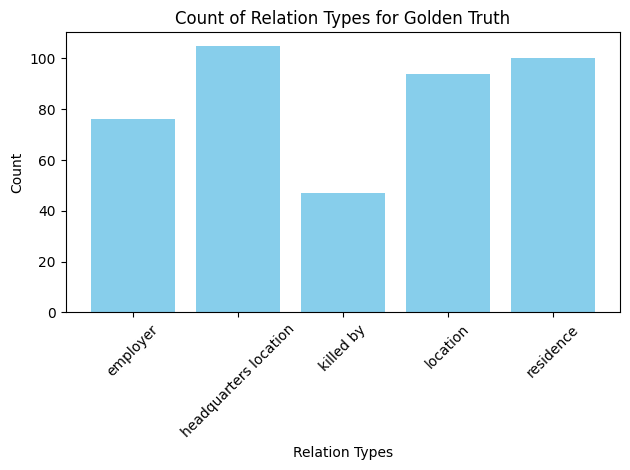

In [122]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Test_triples, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for Golden Truth')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## test_triple_nostring_mistral

[76, 105, 47, 94, 100]


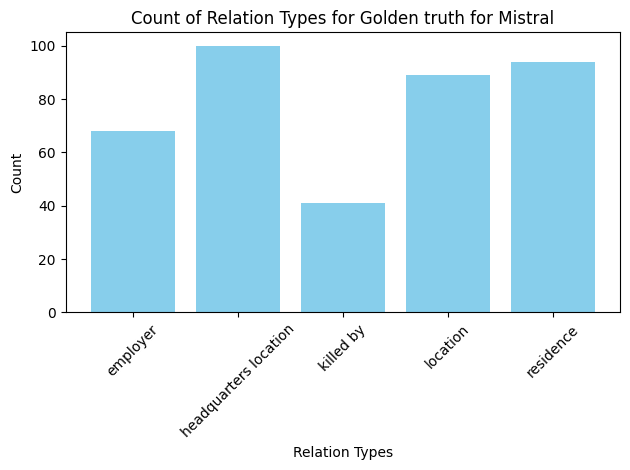

In [123]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open( test_triple_nostring_mistral, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']
print(counts)
# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for Golden truth for Mistral')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## test_triple_nostring_gemma

[68, 100, 41, 89, 94]


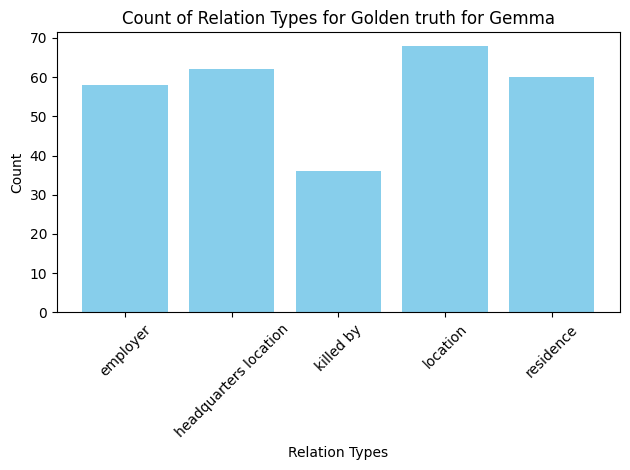

In [124]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(test_triple_nostring_gemma, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']
print(counts)
# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]

# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for Golden truth for Gemma')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Pred_rebel_nostring_mistral_5rel

In [125]:
import json
with open(Pred_rebel_nostring_mistral, 'r') as file:
    data = json.load(file)

new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open(Pred_rebel_nostring_mistral_5rel, "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


[138, 107, 23, 82, 45]


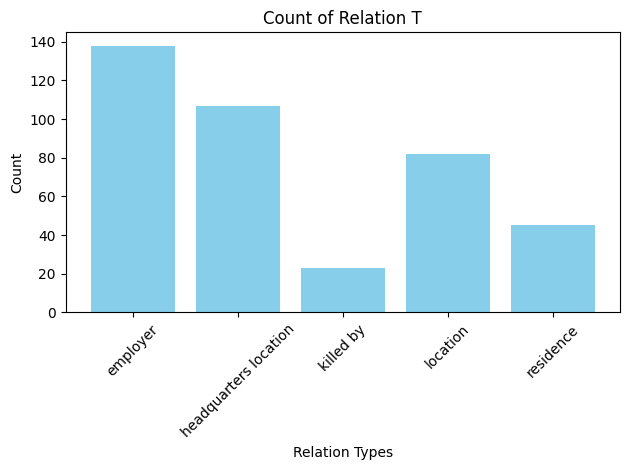

In [133]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Pred_rebel_nostring_mistral_5rel, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)
# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation T')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Pred_rebel_nostring_gemma_5rel

In [128]:
import json
with open(Pred_rebel_nostring_gemma, 'r') as file:
    data = json.load(file)

new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open(Pred_rebel_nostring_gemma_5rel, "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


[94, 81, 21, 56, 41]


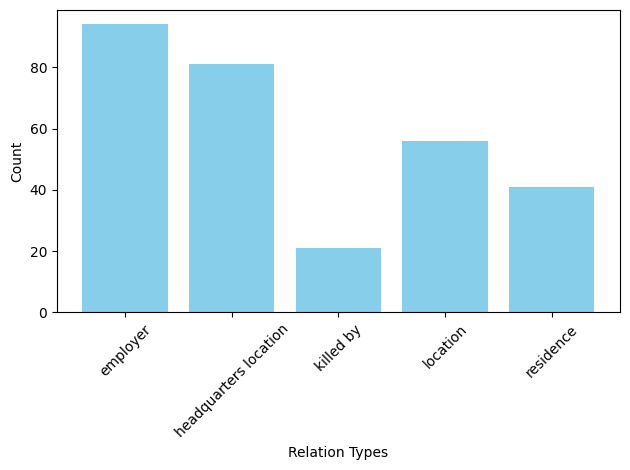

In [132]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Pred_rebel_nostring_gemma_5rel, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)
# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Pred_mistral_nostring_5rel 

In [130]:
import json
with open(Pred_mistral_nostring, 'r') as file:
    data = json.load(file)

new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open(Pred_mistral_nostring_5rel , "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


[133, 101, 23, 78, 46]


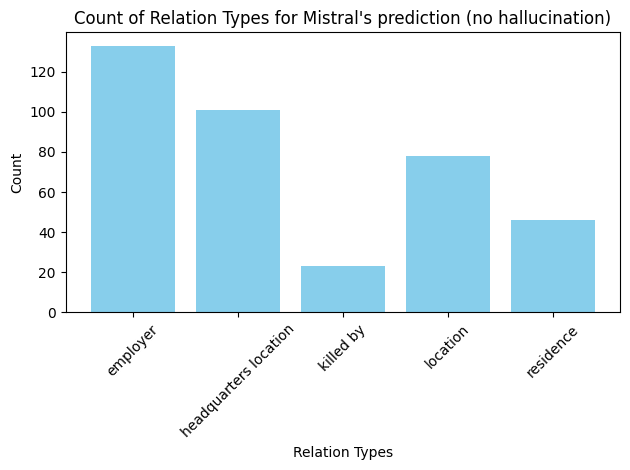

In [131]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Pred_mistral_nostring_5rel , 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)
# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for Mistral\'s prediction (no hallucination)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Pred_gemma_nostring_5rel 

In [134]:
import json
with open(Pred_gemma_nostring, 'r') as file:
    data = json.load(file)

new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open(Pred_gemma_nostring_5rel , "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


[99, 75, 20, 53, 42]


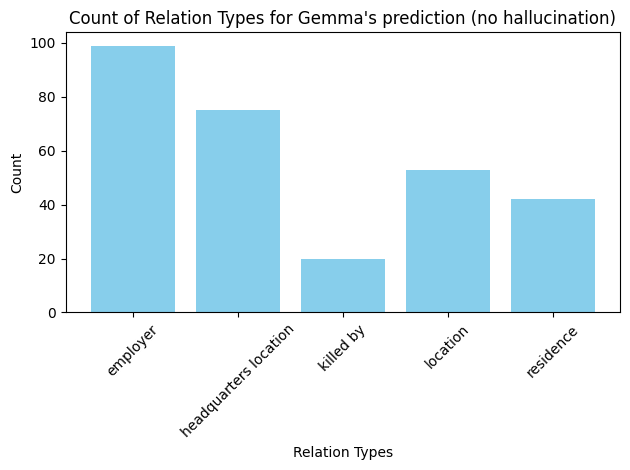

In [135]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Pred_gemma_nostring_5rel , 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)
# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for Gemma\'s prediction (no hallucination)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Pred_rebel_5rel

In [137]:
import json
with open(Pred_rebel, 'r') as file:
    data = json.load(file)

new_data = []
for obj in data:
    new_obj = {
        "title": obj["title"],
        "context": obj["context"],
        "id": obj["id"],
        "triples": []
    }
    for triple in obj["triples"]:
        for key, value in mapping.items():
            if triple["type"] in value:
                triple["type"] = key
                break
        new_obj["triples"].append(triple)
    new_data.append(new_obj)

# Write new JSON objects to a new file
with open(Pred_rebel_5rel, "w") as outfile:
    json.dump(new_data, outfile, indent=4)

print("New file 'new_data.json' created with updated types.")

New file 'new_data.json' created with updated types.


[151, 116, 27, 84, 51]


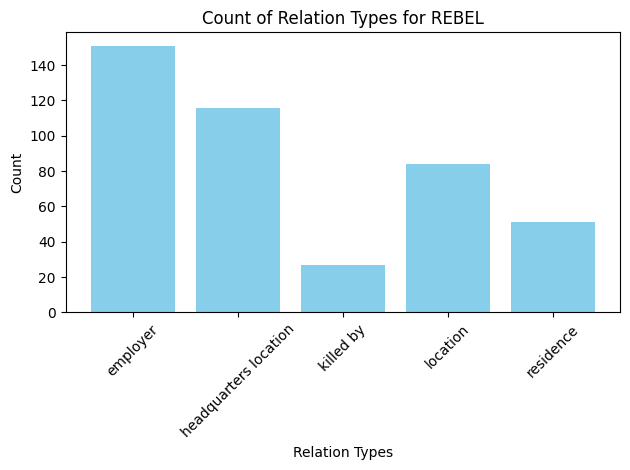

In [138]:
import json
import matplotlib.pyplot as plt

# Read the JSON file
with open(Pred_rebel_5rel, 'r') as f:
    data = json.load(f)

# Extract relation types and count occurrences
relation_counts = {}
for entry in data:
    for triple in entry['triples']:
        relation_type = triple['type']
        relation_counts[relation_type] = relation_counts.get(relation_type, 0) + 1

# Assuming you have only 5 relation types
# If there could be more types, you might need to modify this
relation_types = ['employer', 'headquarters location', 'killed by', 'location', 'residence']

# Initialize counts for each relation type
counts = [relation_counts.get(rel_type, 0) for rel_type in relation_types]
print(counts)
# Plotting
plt.bar(relation_types, counts, color='skyblue')
plt.xlabel('Relation Types')
plt.ylabel('Count')
plt.title('Count of Relation Types for REBEL')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Evaluation

### Evaluation

In [56]:
import json

# Function to calculate precision, recall, and F1 score
def calculate_scores(tp, total_golden, total_prediction):
    precision = tp / total_prediction if total_prediction > 0 else 0
    recall = tp / total_golden if total_golden > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1

# Function to process the files and calculate the scores, considering extras
def evaluate_predictions_corrected(golden_file, prediction_file):
    # Load the golden truths and predictions
    with open(golden_file, 'r') as f:
        golden_data = json.load(f)
    with open(prediction_file, 'r') as f:
        prediction_data = json.load(f)

    tp = 0
    extras = 0

    # Convert golden data and prediction data into dictionaries for easier access
    golden_dict = {item['id']: set(tuple(triple.items()) for triple in item['triples']) for item in golden_data}
    prediction_dict = {item['id']: set(tuple(triple.items()) for triple in item['triples']) for item in prediction_data}

    # Iterate over each instance in the golden data to calculate true positives
    for id, golden_triples in golden_dict.items():
        prediction_triples = prediction_dict.get(id, set())
        tp += len(golden_triples & prediction_triples)

    # Calculate extras in prediction
    for id, prediction_triples in prediction_dict.items():
        if id not in golden_dict:
            extras += len(prediction_triples)
        else:
            unmatched_triples = prediction_triples - golden_dict[id]
            print(unmatched_triples)
            extras += len(unmatched_triples)

    # Calculate micro scores
    total_golden = sum(len(triples) for triples in golden_dict.values())
    total_prediction = sum(len(triples) for triples in prediction_dict.values())
    precision_micro, recall_micro, f1_micro = calculate_scores(tp, total_golden, total_prediction)

    # Calculate macro scores
    total_items = len(golden_dict)
    precision_macro, recall_macro, f1_macro = 0, 0, 0
    for id, golden_triples in golden_dict.items():
        prediction_triples = prediction_dict.get(id, set())
        tp = len(golden_triples & prediction_triples)
        precision, recall, _ = calculate_scores(tp, len(golden_triples), len(prediction_triples))
        precision_macro += precision
        recall_macro += recall
    precision_macro /= total_items
    recall_macro /= total_items
    f1_macro = 2 * (precision_macro * recall_macro) / (precision_macro + recall_macro) if (precision_macro + recall_macro) > 0 else 0

    return {
        'micro': {
            'precision': precision_micro,
            'recall': recall_micro,
            'f1': f1_micro
        },
        'macro': {
            'precision': precision_macro,
            'recall': recall_macro,
            'f1': f1_macro
        },
        'true_positives': tp,
        'extras': extras
    }

In [105]:
### Golden_truth for evals
test_triple_nostring_mistral = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_mistral.json" #262 instances, 5 realtions (subset of testing for gemma)
test_triple_nostring_gemma = "/Users/ananyahooda/Desktop/final/Test_triple_nostring_gemma.json" #187 instances, 5 relations (subset of testing for mistral)
Test_triples = "/Users/ananyahooda/Desktop/final/data/extracted_data/conll04/test_triples.json" # Has 5 relation types, 288 instances

#### Need to cluster [EDA]
Pred_rebel_nostring_mistral = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral.json" #262 instances, 67 relations, for comparison with mistral
Pred_rebel_nostring_gemma = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma.json" #187 instances, 56 relations, for comparison with gemma
Pred_mistral_nostring = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring.json" #262 instances, 66 relations
Pred_gemma_nostring = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring.json" #187 instances, 56 relations
Pred_rebel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel.json" #Has 68 relation types, 288 instances

#######
Pred_mistral = "/Users/ananyahooda/Desktop/final/pred_conll04_Mistral.json"  #  no meaning of relation     , 288 instances, -26 as strings = 268 instances
Pred_gemma = "/Users/ananyahooda/Desktop/final/pred_gemmma_conll04.json" #    no meaning of relation         , 288 instances, -99 as strings = 187 instances

## Clustered to 5 relation, ready for evals
Pred_rebel_nostring_mistral_5rel =  "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_mistral_5rel.json" #262 instances, 5 relations, for comparison with mistral
Pred_rebel_nostring_gemma_5rel = "/Users/ananyahooda/Desktop/final/pred_rebel_nostring_gemma_5rel.json" #187 instances, 5 relations, for comparison with gemma
Pred_mistral_nostring_5rel = "/Users/ananyahooda/Desktop/final/Pred_mistral_nostring_5rel.json" #262 instances, 5 relations
Pred_gemma_nostring_5rel = "/Users/ananyahooda/Desktop/final/Pred_gemma_nostring_5rel.json" #187 instances, 5 relations
Pred_rebel_5rel = "/Users/ananyahooda/Desktop/final/pred_conll04_extracted_from_rebel_5rel.json" #Has 5 relation types, 288 instances

### compare rebel_rel5 with test_triples

In [140]:
scores = evaluate_predictions_corrected(Test_triples, Pred_rebel_5rel)
print("compare rebel_rel5 with test_triples")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

{(('head', 'Lennon'), ('type', 'killed by'), ('tail', 'Lennon'))}
{(('head', 'Valparaiso'), ('type', 'location'), ('tail', 'Chile'))}
{(('head', 'Shoshone'), ('type', 'headquarters location'), ('tail', 'Idaho')), (('head', 'Bannock'), ('type', 'headquarters location'), ('tail', 'Idaho'))}
{(('head', 'Maryland'), ('type', 'headquarters location'), ('tail', 'House of Delegates'))}
{(('head', 'Miguel Rodriguez Mendoza'), ('type', 'residence'), ('tail', 'Venezuela'))}
{(('head', 'Bruce Springsteen'), ('type', 'residence'), ('tail', 'New Jersey'))}
{(('head', 'Armenia'), ('type', 'location'), ('tail', 'Yerevan')), (('head', 'Moscow'), ('type', 'employer'), ('tail', 'Leningrad')), (('head', 'Leningrad'), ('type', 'employer'), ('tail', 'Moscow')), (('head', 'Bolshoi Ballet'), ('type', 'location'), ('tail', 'Moscow')), (('head', 'Yerevan'), ('type', 'location'), ('tail', 'Armenia'))}
set()
{(('head', '1988'), ('type', 'location'), ('tail', '1988'))}
{(('head', 'Berlin'), ('type', 'location'), 

### test_triple_nostring_mistral,Pred_rebel_nostring_mistral_5rel)

In [141]:
scores = evaluate_predictions_corrected(test_triple_nostring_mistral,Pred_rebel_nostring_mistral_5rel)
print("test_triple_nostring_mistral,Pred_rebel_nostring_mistral_5rel)")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

{(('head', 'Lennon'), ('type', 'killed by'), ('tail', 'Lennon'))}
{(('head', 'Valparaiso'), ('type', 'location'), ('tail', 'Chile'))}
{(('head', 'Shoshone'), ('type', 'headquarters location'), ('tail', 'Idaho')), (('head', 'Bannock'), ('type', 'headquarters location'), ('tail', 'Idaho'))}
{(('head', 'Maryland'), ('type', 'headquarters location'), ('tail', 'House of Delegates'))}
{(('head', 'Miguel Rodriguez Mendoza'), ('type', 'residence'), ('tail', 'Venezuela'))}
{(('head', 'Bruce Springsteen'), ('type', 'residence'), ('tail', 'New Jersey'))}
{(('head', 'Armenia'), ('type', 'location'), ('tail', 'Yerevan')), (('head', 'Moscow'), ('type', 'employer'), ('tail', 'Leningrad')), (('head', 'Leningrad'), ('type', 'employer'), ('tail', 'Moscow')), (('head', 'Bolshoi Ballet'), ('type', 'location'), ('tail', 'Moscow')), (('head', 'Yerevan'), ('type', 'location'), ('tail', 'Armenia'))}
set()
{(('head', 'Berlin'), ('type', 'location'), ('tail', 'Federal Republic')), (('head', 'Kurds'), ('type', '

### test_triple_nostring_gemma,Pred_rebel_nostring_gemma_5rel)

In [142]:
scores = evaluate_predictions_corrected(test_triple_nostring_gemma,Pred_rebel_nostring_gemma_5rel)
print("test_triple_nostring_gemma,Pred_rebel_nostring_gemma_5rel)")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

{(('head', 'Valparaiso'), ('type', 'location'), ('tail', 'Chile'))}
{(('head', 'Maryland'), ('type', 'headquarters location'), ('tail', 'House of Delegates'))}
{(('head', 'Bruce Springsteen'), ('type', 'residence'), ('tail', 'New Jersey'))}
{(('head', 'Armenia'), ('type', 'location'), ('tail', 'Yerevan')), (('head', 'Moscow'), ('type', 'employer'), ('tail', 'Leningrad')), (('head', 'Leningrad'), ('type', 'employer'), ('tail', 'Moscow')), (('head', 'Bolshoi Ballet'), ('type', 'location'), ('tail', 'Moscow')), (('head', 'Yerevan'), ('type', 'location'), ('tail', 'Armenia'))}
set()
{(('head', '1988'), ('type', 'location'), ('tail', '1988'))}
{(('head', 'Berlin'), ('type', 'location'), ('tail', 'Federal Republic')), (('head', 'Kurds'), ('type', 'location'), ('tail', 'Federal Republic')), (('head', 'Federal Republic'), ('type', 'headquarters location'), ('tail', 'Kurds')), (('head', 'Federal Administrative Court'), ('type', 'location'), ('tail', 'Federal Republic')), (('head', 'Federal Repu

### test_triple_nostring_mistral, Pred_mistral_nostring_5rel)

In [144]:
scores = evaluate_predictions_corrected(test_triple_nostring_mistral, Pred_mistral_nostring_5rel)
print("test_triple_nostring_mistral, Pred_mistral_nostring_5rel)")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

set()
set()
{(('head', 'American system'), ('type', 'named after'), ('tail', 'We the People'))}
set()
{(('head', 'Watergate special prosecutor'), ('type', 'killed by'), ('tail', 'Watergate'))}
{(('head', 'Cuban missile crisis'), ('type', 'employer'), ('tail', 'Kennedy')), (('head', 'Cuban missile crisis'), ('type', 'employer'), ('tail', 'Nikita Khrushchev'))}
{(('head', 'Anastas Mikoyan'), ('type', 'employer'), ('tail', 'Soviet first deputy premier'))}
set()
{(('head', 'Soviet'), ('type', 'location'), ('tail', 'Moscow'))}
set()
{(('head', 'Hot Springs National Park'), ('type', 'headquarters location'), ('tail', 'Ark.'))}
{(('head', 'Fort Wainwright annex'), ('type', 'headquarters location'), ('tail', 'Fairbanks, Alaska'))}
{(('head', 'ATLANTIC CITY'), ('type', 'headquarters location'), ('tail', 'N.J.'))}
{(('head', 'FRESNO'), ('type', 'headquarters location'), ('tail', 'Calif.'))}
{(('head', 'Yerevan'), ('type', 'headquarters location'), ('tail', 'Armenian')), (('head', 'Armenian'), ('

### test_triple_nostring_gemma, Pred_gemma_nostring_5rel)

In [145]:
scores = evaluate_predictions_corrected(test_triple_nostring_gemma, Pred_gemma_nostring_5rel)
print("test_triple_nostring_gemma, Pred_gemma_nostring_5rel)")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

{(('head', 'Italy'), ('type', 'headquarters location'), ('tail', 'PERUGIA'))}
{(('head', 'American system'), ('type', 'residence'), ('tail', 'American history')), (('head', 'American history'), ('type', 'employer'), ('tail', 'American system'))}
set()
set()
{(('head', 'Watergate special prosecutor'), ('type', 'killed by'), ('tail', 'Watergate'))}
{(('head', 'Anastas Mikoyan'), ('type', 'employer'), ('tail', 'Soviet first deputy premier'))}
{(('head', 'Soviet'), ('type', 'location'), ('tail', 'Moscow'))}
set()
{(('head', 'Fort Wainwright annex'), ('type', 'headquarters location'), ('tail', 'Fairbanks, Alaska'))}
{(('head', 'ATLANTIC CITY'), ('type', 'headquarters location'), ('tail', 'N.J.'))}
{(('head', 'Armenia'), ('type', 'location'), ('tail', 'Yerevan')), (('head', 'Moscow'), ('type', 'employer'), ('tail', 'Leningrad')), (('head', 'Leningrad'), ('type', 'employer'), ('tail', 'Moscow')), (('head', 'Bolshoi Ballet'), ('type', 'location'), ('tail', 'Moscow')), (('head', 'Yerevan'), ('t

### Pred_rebel_nostring_mistral_5rel, Pred_mistral_nostring_5rel)

In [146]:
scores = evaluate_predictions_corrected(Pred_rebel_nostring_mistral_5rel, Pred_mistral_nostring_5rel)
print("Pred_rebel_nostring_mistral_5rel, Pred_mistral_nostring_5rel)")
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

set()
set()
{(('head', 'American system'), ('type', 'named after'), ('tail', 'We the People'))}
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
{(('head', 'Yerevan'), ('type', 'headquarters location'), ('tail', 'Armenian')), (('head', 'Armenian'), ('type', 'location'), ('tail', 'Yerevan'))}
set()
{(('head', 'Ostved'), ('type', 'location'), ('tail', 'Lesny')), (('head', 'Ostved'), ('type', 'location'), ('tail', 'Liberec')), (('head', 'Lesny'), ('type', 'location'), ('tail', 'Ostved')), (('head', 'Liberec'), ('type', 'location'), ('tail', 'Ostved'))}
set()
{(('head', 'Bingham County'), ('type', 'employer'), ('tail', "Sheriff's")), (('head', "Sheriff's"), ('type', 'headquarters location'), ('tail', 'Bingham County'))}
set()
set()
set()
set()
set()
set()
set()
set()
{(('head', "Maryland's House of Delegates"), ('type', 'employer'), ('tail', 'Judith C. Toth'))}
set()
{(('head', 'Shoshone-Bannock reservation'), ('type', 'headquarters location'), ('tail', 'Idaho'))}
set()
se

### Pred_mistral_nostring_5rel, Pred_rebel_nostring_mistral_5rel)

In [113]:
scores = evaluate_predictions_corrected(Pred_mistral_nostring_5rel, Pred_rebel_nostring_mistral_5rel)
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(scores['extras'])

set()
set()
{(('head', 'Shoshone'), ('type', 'headquarters location'), ('tail', 'Idaho')), (('head', 'Bannock'), ('type', 'headquarters location'), ('tail', 'Idaho'))}
{(('head', 'House of Delegates'), ('type', 'headquarters location'), ('tail', 'Maryland')), (('head', 'Maryland'), ('type', 'headquarters location'), ('tail', 'House of Delegates'))}
set()
set()
{(('head', 'Armenia'), ('type', 'location'), ('tail', 'Yerevan')), (('head', 'Moscow'), ('type', 'employer'), ('tail', 'Leningrad')), (('head', 'Kirov Ballet'), ('type', 'headquarters location'), ('tail', 'Leningrad')), (('head', 'Leningrad'), ('type', 'employer'), ('tail', 'Moscow')), (('head', 'Bolshoi Ballet'), ('type', 'location'), ('tail', 'Moscow')), (('head', 'Yerevan'), ('type', 'location'), ('tail', 'Armenia'))}
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
{(('head', 'Mark David Chapman'), ('type', 'killed by'), ('tail', 'shot and killed')), (('head', 'shot and killed'),

In [ ]:
scores = evaluate_predictions_corrected('golden_truth_gemmma.json', 'prediction_gemmma.json')
print("Micro Scores:", scores['micro'])
print("Macro Scores:", scores['macro'])
print(len(scores['extras']))
print(scores['extras'])